In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

import pitszi

In [2]:
C = pitszi.Model()

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                           Model                            
------------------------------------------------------------
Setting gNFW Planck coll. (2013) UPP.
Setting SVM Ghirardini (2019) UPP.


Setting model_pressure_fluctuation value
Fixing: R500 if involved
Setting model_pressure_fluctuation value
Fixing: R500 if involved


(0.0001, 1.0)

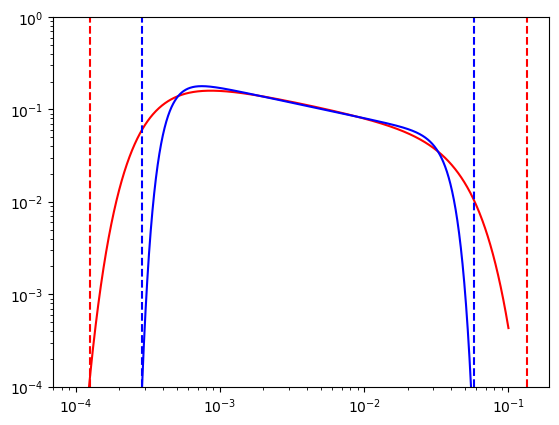

In [14]:
C.model_pressure_fluctuation = {'name': 'CutoffPowerLaw','statistics': 'gaussian','Norm': 0.25,
                                'slope': -3.6666666666666665,'Linj': 2000*u.kpc,'Ldis': 30*u.kpc}
k,pk = C.get_pressure_fluctuation_spectrum()
plt.loglog(k.to_value('kpc-1'), (4*np.pi*k**3*pk).to_value('')**0.5, color='r')
plt.axvline(1/(C.model_pressure_fluctuation['Linj'].to_value('kpc')*(-np.log(1e-7))**(1/2)), color='r', ls='--')
plt.axvline((-np.log(1e-7))**(1/2)/C.model_pressure_fluctuation['Ldis'].to_value('kpc'), color='r', ls='--')

C.model_pressure_fluctuation = {'name': 'ModifiedCutoffPowerLaw','statistics': 'gaussian','Norm': 0.25,
                                'slope': -3.6666666666666665,'Linj': 2000*u.kpc,'Ldis': 30*u.kpc,
                                'Ninj': 5,'Ndis': 5}
k,pk = C.get_pressure_fluctuation_spectrum()
plt.loglog(k.to_value('kpc-1'), (4*np.pi*k**3*pk).to_value('')**0.5, color='b')
plt.axvline(1/(C.model_pressure_fluctuation['Linj'].to_value('kpc') * (-np.log(1e-7))**(1/C.model_pressure_fluctuation['Ninj'])), color='b', ls='--')
plt.axvline((-np.log(1e-7))**(1/C.model_pressure_fluctuation['Ndis'])/C.model_pressure_fluctuation['Ldis'].to_value('kpc'), color='b', ls='--')
plt.ylim(1e-4,1e0)

In [5]:
k = np.array([0,1,2,3])*u.kpc**-1
pk = np.array([0,1,1,0])*u.kpc**3

C.model_pressure_fluctuation = {'name': 'User',
                                'statistics': 'gaussian',
                                'k': k,
                                'pk': pk}

k,pk = C.get_pressure_fluctuation_spectrum()
plt.loglog(k, pk)

Setting model_pressure_fluctuation value
Fixing: R500 if involved
To do


UnboundLocalError: local variable 'p3d_k' referenced before assignment